<a href="https://colab.research.google.com/github/Aartizikre150/DAb300/blob/main/Lab_2_Part_2_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Part 2: **Image preprocessing and using a fully connected neural network for image classification.** Cont..

**Prerequisite**

- **Task 1**: Get set up with Google Colab
- **Task 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Task 3:** Preprocess images for use in Task 4
---

In this lab, we will continue where we left off in *Part 1*. We will add a couple tasks to what you have already done:

- **Task 5**: Modify the network of **Task 2** so that it can work with the data from **Task 3** (10 Marks)
- **Task 6**: Modify the network of **Task 5** to improve the accuracy
(10 Marks)
- **Task 7**: Questions (10 Marks)



## **Group - Num**
*   Aarti Anil Zikre - 825897
*   Andrews Truman - 824852
*   Premkumar Janakbhai Patel - 829257
*   Vitthlesh Sheth - 825950

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

## Add all the code used for Task 3:  Preprocess images below

In [ ]:
p = Path().cwd()
q =  p/('/content/drive/MyDrive/Colab Notebooks/Sem3/Lego_small') # None # use p to create a path to the data

target_dict = {
    'brick 1x2' : 0,
    'brick 2x2' : 1,
    'brick 2x4' : 2,
    'plate 1x2' : 3,
    'plate 2x2' : 4,
    'plate 2x4' : 5,
 } # create dictionary mapping Lego block type to integer label

images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir():
    current_label = fldr # get the name of the current label
    for img in current_label.iterdir():
        img = load_img(img, color_mode = 'grayscale') # load a grayscale image
        img_array =img_to_array(img)  # convert the image to an NumPy array
        img_array_resized = smart_resize(img_array,(128,128)) # resize the image to 128 by 128
        img_array_reshaped = img_array_resized.reshape(128,128) # reshape the image from (128, 128, 1) to (128, 128)
        images.append(img_array_reshaped)# add reshaped image to list of images
        labels.append(current_label.name)# add label for this image to the list of labels

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array

In [ ]:
labels

array(['brick 2x2', 'brick 2x2', 'brick 2x2', ..., 'plate 1x2',
       'plate 1x2', 'plate 1x2'], dtype='<U9')

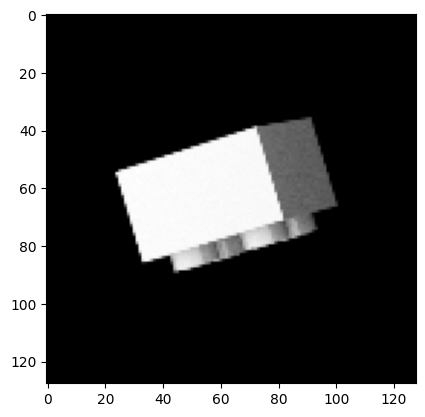

In [ ]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(images[14],cmap= 'gray')

## Task 5

The next step is to modify the network of Task 2 so that it will work with the data that was processed in Task 3.

Here, you will need to:
 - use `sklearn` to create training, validation, and test sets in approximately the following ratio: 70%/20%/10%
 - train your network for 10 epochs while monitoring the accuracy on the validation (to do this, you will need to modify the `.fit()` method)
 - compute the overall accuracy on the test data
 - compute the confusion matrix (use `tf.math.confusion_matrix()`)
 - from the confusion matrix, compute the accuracy for each Lego block type (see image below)

<img src="cm-calculation.jpg" width=600 align="center">

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(images,labels,test_size = 0.3,random_state = 10)
x_validation,x_test,y_validation,y_test = train_test_split(x_temp,y_temp,test_size = 0.33,random_state = 10)

In [ ]:
# Normalize pixel values to the range [0, 1]

train_images = x_train.astype('float32') / 255.0

val_images = x_validation.astype('float32') / 255.0

test_images = x_test.astype('float32') / 255.0

In [ ]:
train_labels = np.array([target_dict[label] for label in y_train])
valid_labels = np.array([target_dict[label] for label in y_validation])
test_labels = np.array([target_dict[label] for label in y_test])

In [ ]:
from tensorflow.keras.layers import Flatten
network7 = Sequential()
network7.add(Flatten(input_shape=(128,128)))  # Flatten the input
network7.add(Dense(512, activation='sigmoid'))
network7.add(Dropout(0.5))
network7.add(Dense(128, activation='sigmoid'))
network7.add(Dense(128, activation='relu'))
network7.add(Dropout(0.5))
network7.add(Dense(num_classes, activation='softmax'))

network7.summary()

network7.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history = network7.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1,validation_data=(val_images, valid_labels))

# Evaluate the model on the test data
test_loss, test_acc = network7.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 16384)             0         
                                                                 
 dense_60 (Dense)            (None, 512)               8389120   
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 128)               65664     
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 6)               

In [ ]:
# Generate predictions for the test data
predictions = network7.predict(test_images)

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    labels=test_labels,
    predictions=tf.argmax(predictions, axis=1),
    num_classes=num_classes
)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix.numpy())

# Calculate class accuracies
class_accuracies = []
for i in range(num_classes):
    true_positives = confusion_matrix[i, i]
    total_samples = np.sum(confusion_matrix[i, :])
    class_accuracy = true_positives / total_samples
    class_accuracies.append(class_accuracy)

# Print class accuracies
for i, acc in enumerate(class_accuracies):
    print(f'Accuracy for Lego block type {i}: {acc * 100:.2f}%')


15/15 [==============================] - 0s 14ms/step
Confusion Matrix:
[[26  0  0 16 44  0]
 [ 0 62  0  0 11  1]
 [ 0  6 48  0  3 16]
 [ 0  0  0 79  0  0]
 [ 1  1  0  4 76  0]
 [ 1  1  5  0  6 69]]
Accuracy for Lego block type 0: 30.23%
Accuracy for Lego block type 1: 83.78%
Accuracy for Lego block type 2: 65.75%
Accuracy for Lego block type 3: 100.00%
Accuracy for Lego block type 4: 92.68%
Accuracy for Lego block type 5: 84.15%


## Task 6

The final step is to modify the network of **Task 5** to improve the accuracy as much as possible. When finished:
 - train your network for as many epochs as necessary for the accuracy to stop improving
 - compute the new overall accuracy on the test data and **compare** with that of **Task 5**
 - compute the new confusion matrix (use `tf.math.confusion_matrix()`) and **compare** with that of **Task 5**
 - using the confusion matrix, compute the new accuracy for each Lego block type and **compare** with that of **Task 5**


In [ ]:
from tensorflow.keras.layers import Flatten
network71 = Sequential()
network71.add(Flatten(input_shape=(128,128)))  # Flatten the input
network71.add(Dense(512, activation='sigmoid'))
network71.add(Dropout(0.5))
network71.add(Dense(128, activation='sigmoid'))
network71.add(Dense(128, activation='relu'))
network71.add(Dropout(0.5))
network71.add(Dense(num_classes, activation='softmax'))

network71.summary()

network71.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history = network71.fit(train_images, train_labels, epochs=22, batch_size=32, verbose=1,validation_data=(val_images, valid_labels))

# Evaluate the model on the test data
test_loss, test_acc = network71.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 16384)             0         
                                                                 
 dense_64 (Dense)            (None, 512)               8389120   
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_65 (Dense)            (None, 128)               65664     
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_67 (Dense)            (None, 6)               

In [ ]:
# Generate predictions for the test data
predictions = network71.predict(test_images)

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    labels=test_labels,
    predictions=tf.argmax(predictions, axis=1),
    num_classes=num_classes
)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix.numpy())

# Calculate class accuracies
class_accuracies = []
for i in range(num_classes):
    true_positives = confusion_matrix[i, i]
    total_samples = np.sum(confusion_matrix[i, :])
    class_accuracy = true_positives / total_samples
    class_accuracies.append(class_accuracy)

# Print class accuracies
for i, acc in enumerate(class_accuracies):
    print(f'Accuracy for Lego block type {i}: {acc * 100:.2f}%')


15/15 [==============================] - 0s 11ms/step
Confusion Matrix:
[[74  0  0 11  1  0]
 [ 5 66  0  0  3  0]
 [ 1  7 50  0  0 15]
 [ 0  0  0 79  0  0]
 [10  0  0  4 68  0]
 [ 2  0  3  0  5 72]]
Accuracy for Lego block type 0: 86.05%
Accuracy for Lego block type 1: 89.19%
Accuracy for Lego block type 2: 68.49%
Accuracy for Lego block type 3: 100.00%
Accuracy for Lego block type 4: 82.93%
Accuracy for Lego block type 5: 87.80%


## Task 7  
**Answer below questions:**

1. Compare the model's performance on Tasks 5 and 6.

In Task 5 the model achieved a test accuracy of approx 0.7563 and in task 6 it is around 0.8592. The model performed significantly better in Task 6 to make more accurate predictions. There is an improvement in the test accuracy and the overall accuracy and this means that the model is performing well to unseen data.

2. Why do training accuracies stop improving after some epochs?

The main reason for not showing any improvemnt in the training accuracy after some epochs is that the model will overfit after some iterations and the model might have learned most of the features from the data. Therefore increasing the epochs number after some point would not cause any improvements.

3. Comment on your model's regularization technique and explain how it helps.

In this model we have used dropout regularization to prevent overfitting with a rate of 0.5  and activation regularization i,e sigmoid and relu. It will prevent overfitting so that it will improve the models ability to generalize to unseen data. This technique contributes to the enhanced model performance and improve a higher test accuracy in neural networks.

4. How does your model behave with respect to training data?

There is an overall increase in the training accuracy and decrease in the loss. It suggests that the model is learning well from the training data and improving its ability to fit the training samples.

5. Suggest some methods that can improve your model in Task 6.
We can improve the models perfromance by implementing several reqularization technique,changing learning rate and optimizer,changing batch size and adjusting hyperparameters.